In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
import os
import sys

In [3]:
os.getcwd()

'/Users/balakrishnareddy/programming_practise/Projects/data-analytics-using-pandas'

In [277]:
import time 

# To get the data from all the sheets, merge, clean to remove unwanted rows, convert string integers to actual integers

### Sorts the months so as to read in proper order 

In [51]:
month_map = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
sorted_months = sorted(months_list, key=lambda month: month_map[month.split('_')[1][:3]])
print(sorted_months)

['Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_April_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv', 'Sales_July_2019.csv', 'Sales_August_2019.csv', 'Sales_September_2019.csv', 'Sales_October_2019.csv', 'Sales_November_2019.csv', 'Sales_December_2019.csv']


### Read the csv files, concatenate them into one single DataFrame

In [129]:
data = pd.DataFrame()
for month in sorted_months:
#     print(month)
    dt = pd.read_csv('Sales_Data/'+month)
    if data.empty:
        data = dt
        continue
    data = pd.concat([data,dt])
    

### Clean the data to remove unwanted rows, and save it to a big final sheet

In [130]:
print("actual data frame shape", data.shape)
data.drop(data[data['Price Each'] == 'Price Each'].index, inplace=True)
print("after dropping the unwanted data", data.shape)
data.to_csv('Sales_data_2019.csv', index=False)

actual data frame shape (186850, 6)
after dropping the unwanted data (183271, 6)


# Entire dataset can be imported here and do the data analytics

### Read the final sheet from csv file

In [323]:
data = pd.read_csv('Sales_data_2019.csv')

### Convert valid numeric values to numeric ones, drop na values


In [324]:
data.dropna(inplace=True)
data.reset_index()

try:
    data['Order ID'] = pd.to_numeric(data['Order ID']).astype('int32')
    data['Price Each'] = pd.to_numeric(data['Price Each']).astype('float')
    data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered']).astype('int32')
    data['Order Date'] = pd.to_datetime(data['Order Date'])
except Exception as x:
    print(x)

0         141234
1         141235
2         141236
3         141237
4         141238
           ...  
183266    319666
183267    319667
183268    319668
183269    319669
183270    319670
Name: Order ID, Length: 182735, dtype: int64

In [270]:
data.dropna(inplace=True)
data.reset_index()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
182730,183266,319666.0,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
182731,183267,319667.0,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
182732,183268,319668.0,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
182733,183269,319669.0,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


### Check the best month for overall sales

In [281]:
""" There are multiple ways to filter out month. Below are the two ways which I found"""
p = time.time()
data[(data['Order Date'] < pd.to_datetime('2019-05-01 00:00:00')) & (data['Order Date'] >= pd.to_datetime('2019-04-01 00:00:00'))]
q = time.time()
print(q-p)
"""or"""
p = time.time()
data[data['Order Date'].dt.month == 4.0]   # This is easy to read
q = time.time()
print(q-p)

0.00812387466430664
0.01485300064086914


In [346]:
data['Month'] = data['Order Date'].dt.month
data['Revenue'] = data["Quantity Ordered"]*data['Price Each']
new_table = data.groupby('Month').sum()

/var/folders/pw/1y12vnxd6rsd7mk1hsc9fplm0000gn/T/ipykernel_43219/3134729744.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_table = data.groupby('Month').sum()


In [352]:
new_table.index

# dic = {}
# max_month = 0
# max_rev = 0
# for i in range(1,13):
#     dic[i] = sum(data['Revenue'][data['Order Date'].dt.month == i])
#     if dic[i] > max_rev:
#         max_rev = dic[i]
#         max_month = i

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

<AxesSubplot: xlabel='Month', ylabel='Sales in Rupees'>

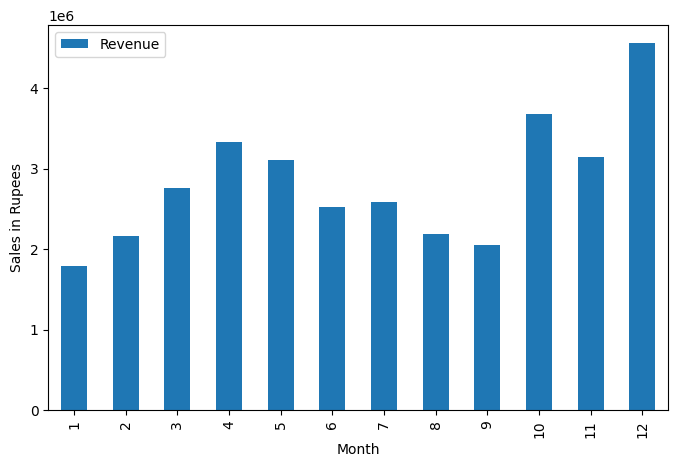

In [360]:
new_table.plot(kind='bar', y='Revenue', ylabel='Sales in Rupees', figsize=(8,5))

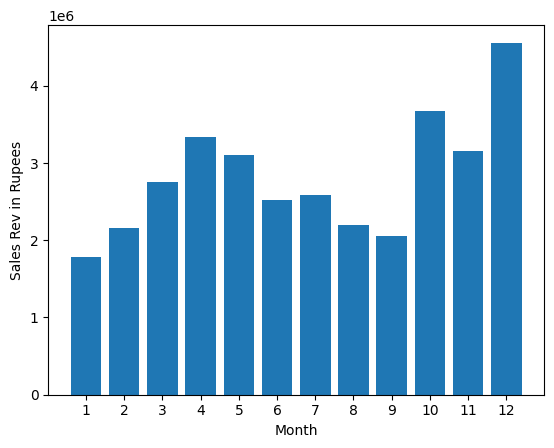

In [382]:
plt.bar(new_table.index, new_table['Revenue'])
plt.xticks(new_table.index)
plt.xlabel('Month')
plt.ylabel('Sales Rev in Rupees')
plt.show()

### Which city has highest number of sales

In [401]:
data['City']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Revenue,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1
...,...,...,...,...,...,...,...,...
183266,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12
183267,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12
183268,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12
183269,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12


In [439]:
1+2

In [417]:
data['City'] = data['Purchase Address'].str.split(',')[1]

ValueError: Length of values (3) does not match length of index (182735)

In [430]:
data['Purchase Address']

In [419]:
data['Purchase Address'].str

In [431]:
data['Purchase Address']

In [440]:
1+2